# Equalização de Histograma

A transformação de contraste que procura distribuir a ocorrência dos níveis de cinza igualmente
na faixa de tons de cinza é denominada equalização de histograma.

O objetivo do exemplo a seguir é o de fazer a equalização de histograma de uma imagem. Ele é
dado pela aplicação de uma transformação de contraste T(r) que é calculado pelo histograma
acumulado normalizado da imagem.

## Equação da Transformação de Intensidade para Equalizar Histograma

A equação da transformação de intensidade T(r) a partir do histograma h(i) da imagem que equaliza
a imagem, é dada por:

$$   T(r) = \frac{(L-1)}{n} \sum_{i = 0}^{r} h(i), \quad r = 0, 1,..., L-1 $$
   
- Os valores de intensidade dos pixels da imagem (indices i e r) variam de 0 a L-1;
- n é o número total de pixels na imagem;
- $h(i)$ é o histograma da imagem, i. e., é o número de vezes que o nível de cinza i aparece na imagem;    
- $T(r)$ é a função de mapeamento que equaliza a imagem dada pelo histograma $h$.
- $L$ é o número de níveis na imagem final, usualmente 256 para imagens ``uint8``.


Existem dois pontos que devem ser considerados no uso da equalização de histograma:

1. A formulação acima é exata no caso contínuo. Para o caso discreto, o histograma equalizado
   não fica totalmente planar pois não é possível no modelo acima distribuir um nível de cinza
   com muita ocorrência em mais de um valor de cinza. Normalmente mostra-se o histograma acumulado
   que é normalmente uma reta de 45 graus, como será visto no exemplo abaixo. Veremos num outro
   tutorial uma forma de contornar este problema.
   

## Ilustração da equalização de histograma

A imagem original é mostrada a seguir, e para fins ilustrativos, a imagem com seus pixels ordenados também é mostrada ao
lado mostrando por exemplo que a imagem tem uma predominância de níveis de cinza escuros, bem 
destacados.

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import sys,os
ia898path = os.path.abspath('/etc/jupyterhub/ia898_1s2017/')
if ia898path not in sys.path:
    sys.path.append(ia898path)
import ia898.src as ia

""
Imagem original
""
Imagem pixels ordenados

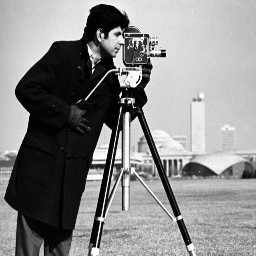
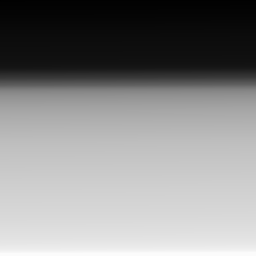

In [7]:
nb = ia.nbshow(2)
f = mpimg.imread('../data/cameraman.tif')
nb.nbshow(f,'Imagem original')
fsort = np.sort(f.ravel()).reshape(f.shape)
nb.nbshow(fsort, 'Imagem pixels ordenados')
nb.nbshow()

Plotamos seu histograma e calculamos a transformação de contraste que equaliza o histograma baseado
na equação vista anteriormente. O somatório da equação é eficientemente calculado com a função
``np.cumsum`` que calcula a soma acumulada de um vetor. Visualizamos a transformação T[r] pelo gráfico:
   

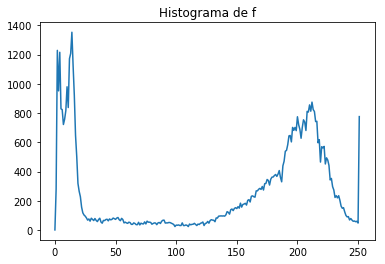

In [10]:
h = ia.histogram(f)
plt.plot(h),plt.title('Histograma de f');

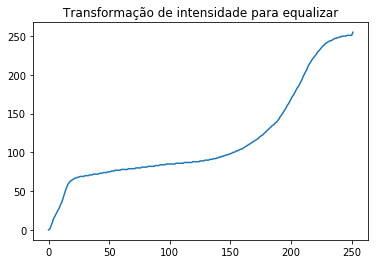

In [13]:
n = f.size
T = 255./n * np.cumsum(h)
T = T.astype('uint8')
plt.plot(T),plt.title('Transformação de intensidade para equalizar');

A aplicação da transformação T em f: fazendo-se g = T[f], resulta na imagem g equalizada.
Para fins ilustrativos, colocamos ao lado a imagem equalizada com seus pixels ordenados.
Observa-se que a distribuição dos níveis de cinza ficou uniforme:
 

""
"imagem original, média=137"
""
"imagem equalizada, média=128"
""
imagem equalizada ordenada

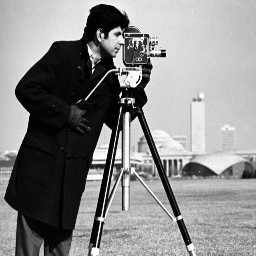
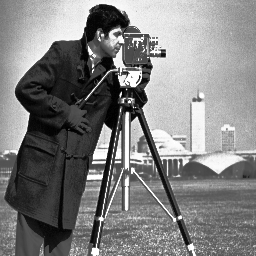
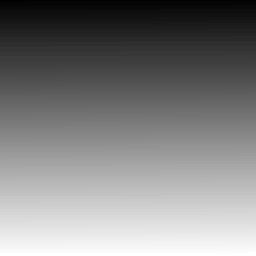

In [17]:
nb = ia.nbshow(3)
nb.nbshow(f,'imagem original, média=%d' % (f.mean()))
g = T[f]
nb.nbshow(g, 'imagem equalizada, média=%d' % (g.mean()))
gsort = np.sort(g.ravel()).reshape(g.shape)
nb.nbshow(gsort, 'imagem equalizada ordenada')
nb.nbshow()

Finalmente, plotamos o histograma da imagem equalizada. Note o efeito mencionado acima em que o
histograma equalizado fica espalhado. Quando se calcula o histograma acumulado, nota-se daí que
o histograma de fato está normalizado.
   

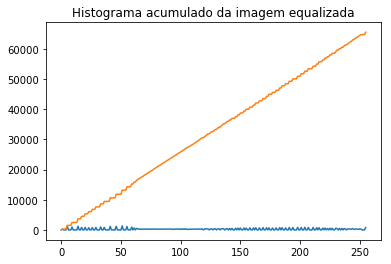

In [19]:
hg = ia.histogram(g)
plt.plot(hg),plt.title('Histograma da imagem equalizada')
hgc = np.cumsum(hg)
plt.plot(hgc),plt.title('Histograma acumulado da imagem equalizada');

Um problema da formulação simplificada acima é que no caso da imagem original não ter nenhum
pixel igual a zero, a equalização da imagem usando esta formulação não irá fazer com que o
menor pixel seja zero. Veja o exemplo a seguir, onde o menor valor do pixel na imagem original é 75:

In [ ]:
   f = adreadgray('angiogr.tif')
   f = np.clip(f,75,255)
   adshow(f)
   h = ia.iahistogram(f)
   adshow(ia.iaplot(h))
   print 'info:',ia.iaimginfo(f)

Observe que a Transformação que equaliza a imagem, o seu primeiro valor
não zero é 8 (pois T[75] = 8). Isto faz com que o menor valor da imagem equalizada resultante seja 8 e não zero como
desejado:

In [ ]:
   n = f.size
   T = 255./n * np.cumsum(h)
   T = T.astype(uint8)
   print 'T:',T
   adshow(ia.iaplot([T]), 'Transformação de intensidade para equalizar')
   g = T[f]
   print 'info:', ia.iaimginfo(g)
   adshow(g, 'imagem equalizada')

Para fazer com que o valor do menor pixel da imagem equalizada seja zero, temos duas opções básicas:

1. Após a equalização, normalizar a imagem entre 0 e 255. Isto pode ser feito com  `ia898:normalize`.
2. Outra solução é alterar a equação do início desta página já incorporando esta normalização final. Esta
   equação é a mesma que aparece na descrição da Wikipedia, no link no final da página:

   gn = ia.ianormalize(g)
   print 'info:',ia.iaimginfo(gn)
   adshow(gn, 'imagem equalizada e normalizada')
   hgn = ia.iahistogram(gn)
   adshow(ia.iaplot(hgn),'histograma')

## Verificando a equação da wikipedia

In [ ]:
import numpy as np
   import ia636 as ia 
   wiki=np.array([[52,55,61,66,70,61,64,73],
                  [63,59,55,90,109,85,69,72],
                  [62,59,68,113,144,104,66,73],
                  [63,58,71,122,154,106,70,69],
                  [67,61,68,104,126,88,68,70],
                  [79,65,60,70,77,68,58,75],
                  [85,71,64,59,55,61,65,83],
                  [87,79,69,68,65,76,78,94]])
   print 'wiki=\n',wiki
   h = ia.iahistogram(wiki)
   n = wiki.size
   T = 255./n * np.cumsum(h)
   T = np.floor(T).astype(uint8)
   g = T[wiki]
   print 'g=\n',g
   gn = ia.ianormalize(g)
   print 'gn=\n',gn

Comparando-se o resultado (gn) com o valor da Wikipedia, percebemos que existe uma
pequena diferença nos valores de alguns pixels. Esta diferença é devido ao fato que
na equação da Wikipedia, é usado um arredondamento (**round**) enquanto que na
função `ia898:normalize`, é usado um truncamento. A seguir foi feita uma outra
função similar à ianormalize, porém utilizando a função (**round**). Note que
neste caso o resultado confere com a Wikipedia.

In [ ]:
   faux = ravel(g).astype(float)
   minimum = min(faux)
   maximum = max(faux)
   lower = 0
   upper = 255
   gnn = np.round((faux - minimum) * (upper - lower) / (maximum - minimum) + lower,0)
   gnn = reshape(gnn, g.shape).astype(np.int)
   print 'gnn=\n',gnn

## Referências

- [Wikipedia: Histogram Equalization](http://en.wikipedia.org/wiki/Histogram_equalization)
- [NumPy: cumsum](http://docs.scipy.org/doc/numpy/reference/generated/numpy.cumsum.html)
